# Exercise 0.10
Over the next couple of exercises we will make use of the Galton dataset, a dataset of heights of fathers
and sons from the 1877 paper that first discussed the “regression to the mean” phenomenon. This dataset has 928 pairs
of numbers.
* Use the ``load()`` function in the ``galton.py`` file to load the dataset. The file is located under the lxmls/readers folder. Type the following in your Python interpreter:

``import galton as galton
galton_data = galton.load()``

* What are the mean height and standard deviation of all the people in the sample? What is the mean height of the
fathers and of the sons?
* Plot a histogram of all the heights (you might want to use the plt.hist function and the ravel method on
arrays).
* Plot the height of the father versus the height of the son.
* You should notice that there are several points that are exactly the same (e.g., there are 21 pairs with the values 68.5
and 70.2). Use the ``?`` command in ipython to read the documentation for the numpy.random.randn function
and add random jitter (i.e., move the point a little bit) to the points before displaying them. Does your impression
of the data change?

In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import lxmls.readers.galton as galton
import numpy as np

In [9]:
galton_data = galton.load()

In [11]:
print('General')
print(galton_data.mean())
print(galton_data.std())
print('Fathers and sons')
print(galton_data.mean(0))
print(galton_data.std(0))

General
68.19832974137931
2.185000397276442
Fathers and sons
[68.30818966 68.08846983]
[1.78637014 2.51658435]


In [12]:
from matplotlib import pyplot as plt

(array([ 12.,  46., 130., 183., 427., 339., 350., 231.,  84.,  54.]),
 array([61.7, 62.9, 64.1, 65.3, 66.5, 67.7, 68.9, 70.1, 71.3, 72.5, 73.7]),
 <BarContainer object of 10 artists>)

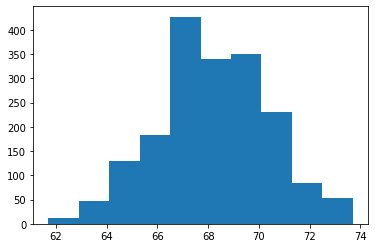

In [13]:
plt.hist(galton_data.ravel())

(array([[  0.,  14.,  23.,  66., 289., 219., 183.,  68.,  43.,  23.],
        [ 12.,  32., 107., 117., 138., 120., 167., 163.,  41.,  31.]]),
 array([61.7, 62.9, 64.1, 65.3, 66.5, 67.7, 68.9, 70.1, 71.3, 72.5, 73.7]),
 <a list of 2 BarContainer objects>)

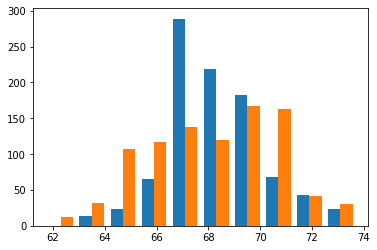

In [14]:
plt.hist(galton_data)

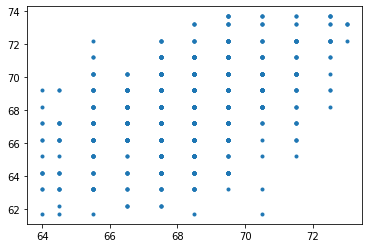

In [16]:
plt.plot(galton_data[:,0], galton_data[:,1], '.')

In [19]:
np.random.randn?

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the ``standard_normal`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python

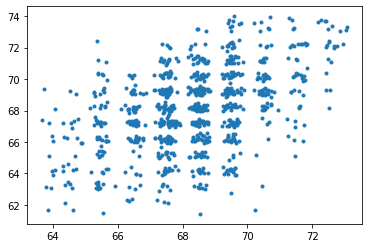

In [26]:
new_galton = galton_data + 0.15 * np.random.randn(*galton_data.shape)
plt.plot(new_galton[:,0], new_galton[:,1], '.')

# Exercise 0.11 
Consider the function $f(x) = x^2$ and its derivative 
$ \frac{\partial f}{\partial x} $.
Look at the derivative of that function at points ``[-2,0,2]``, draw the tangent to the graph in that point 
$ \frac{\partial f}{\partial x}(-2)=-4 $, 
$ \frac{\partial f}{\partial x}(0)=0 $ and 
$ \frac{\partial f}{\partial x}(2)=4 $. 

For example, the tangent
equation for $x = −2$ is $y = −4x − b$, where $b = f(−2)$. The following code plots the function and the derivatives on
those points using matplotlib (See Figure 4).

[-2  0  2]


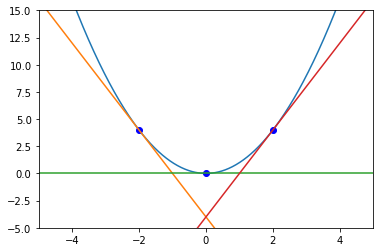

In [33]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(-5,5,0.01)
f_x = np.power(a,2)
plt.plot(a,f_x)
plt.xlim(-5,5)
plt.ylim(-5,15)
k = np.array([-2,0,2])
plt.plot(k,k**2,"bo")
print(k)
for i in k:
    plt.plot(a, (2*i)*a - (i**2))

# Exercise 0.12 
Consider the function $f(x) = (x + 2)^2 − 16 \text{exp}(−(x − 2)^2)$
. Make a function that computes the
function value given x

In [34]:
def funcA(x):
  return (x+2)**2 - 16 * np.exp(-(x-2)**2)

Draw a plot around $x \in [−8, 8]$.

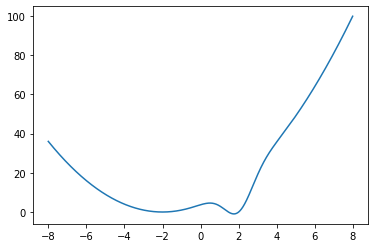

In [39]:
x = np.arange(-8,8,0.01)
plt.plot(x, funcA(x))

Calculate the derivative of the function $f(x)$, implement the function ``get grad(x)``.

In [57]:
def get_grad(x):
  return 2 * x + 4 + 32 * (x-2) * np.exp(-(x-2)**2) 

Use the method gradient descent to find the minimum of this function. Convince yourself that the code is doing the
proper thing. Look at the constants we defined. Note, that we are using a simple approach to pick the step size (always
have the value step size) which is not necessarily correct

In [42]:
def gradient_descent(start_x,func,grad, step_size=0.1):
    # Precision of the solution
    prec = 0.0001
    #Use a fixed small step size
    #step_size = 0.1
    #max iterations
    max_iter = 100
    x_new = start_x
    res = []
    for i in range(max_iter):
        x_old = x_new
        #Use beta egual to -1 for gradient descent
        x_new = x_old - step_size * grad(x_new)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new,f_x_new])
        if(abs(f_x_new - f_x_old) < prec):
            print("change in function values too small, leaving")
            return np.array(res)
    print("exceeded maximum number of iterations, leaving")
    return np.array(res)

Run the gradient descent algorithm starting from $x_0 = −8$ and plot the minimizing sequence.

In [ ]:
res = gradient_descent(-8, funcA, get_grad)
res

change in function values too small, leaving


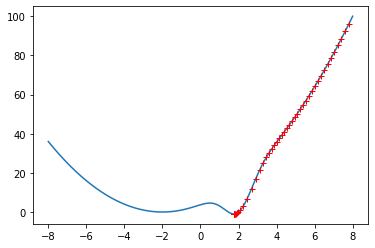

In [59]:
x = np.arange(-8,8,0.001)
y = funcA(x)
plt.plot(x,y)

x_0 = 8
res = gradient_descent(x_0,funcA,get_grad, step_size=0.01)
plt.plot(res[:,0],res[:,1],'r+')

# Exercise 0.13 
Consider the linear regression problem (ordinary least squares) on the Galton dataset, with a single response
variable


$y = x^Tw + ε$

The linear regression problem is, given a set $\{y
(i)\}_i$ of samples of $y$ and the corresponding $x^{(i)}$ vectors, estimate w
to minimise the sum of the $\epsilon$ variables. Traditionally this is solved analytically to obtain a closed form solution (although
this is **not the way in which it should be computed** in this exercise, linear algebra packages have an optimised solver,
with numpy, use ``numpy.linalg.lstsq``).
Alternatively, we can define the error function for each possible $w$:


$e(w) = \sum_i ( x^{(i)^T} w - y^{(i)} )^2.$

1) Derive the gradient of the error $\frac{\partial e}{\partial w_j}$.


$\frac{\partial e}{\partial w_j} = \sum_i 2 x_j^{(i)} ( x^{(i)^T} w - y^{(i)} ).$


2) Implement a solver based on this for two dimensional problem (*i.e.*, $w \in R^2$)

3) Use this method on the Galton dataset from the previous exercise to estimate the relationship between father and son’s height. Try two formulas

$s = f w_1 + \epsilon$, 

where s is the son’s height, and f is the father heights; and

$s = f w_1 + 1w_0 + \epsilon$,

where the input variable is now two dimensional: $(f , 1)$. This allows the intercept to be non-zero.

4) Plot the regression line you obtain with the points from the previous exercise.

5) Use the ``np.linalg.lstsq`` function and compare to your solution.

Plotting regressions:

# Exercise 0.14 
Use the debugger to debug the ``buggy.py`` script which attempts to repeatedly perform the following
computation:....

1. Start $x_0 = 0$
2. Iterate

    (a) $x'_{t+1} = x_t + r$, where $r$ is a random variable.

    (b) if $x'_{t+1} >= 1$, then stop.
    
    (c) if $x'_{t+1} <= 0$, then $x_{t+1} = 0$

    (d) else $x_{t+1} = x'_{t+1}$

3. Return the number of iterations

Having repeated this computation a number of times, the programme prints the average. Unfortunately, the program
has a few bugs, which you need to fix.